In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

loading the data set and defining features and tarets

In [10]:
file_path = r"C:\Users\91944\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Desktop\ml\polynomial_regression_train.csv"
data = pd.read_csv(file_path)

data = data.drop(columns=['ID'])

X = data.drop(columns=['Target']).to_numpy()
y = data['Target'].to_numpy()

splitting the data set into training and testing data set 

In [11]:
def train_test_split_manual(X, y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    indices = np.random.permutation(X.shape[0])
    test_size = int(X.shape[0] * test_size)
    test_indices, train_indices = indices[:test_size], indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2)
X_tarin_mean=X_train.mean()
X_train_std =X_train.std()
X_train=(X_train-X_tarin_mean)/X_train_std
X_test = (X_test-X_tarin_mean)/X_train_std

generating polynomial feaures

In [12]:
def generate_polynomial_features(X, degree):
    n_samples, n_features = X.shape
    poly_features = np.ones((n_samples, 1))  # Bias term
    for d in range(1, degree + 1):
        for combination in np.array(np.meshgrid(*[range(n_features) for _ in range(d)])).T.reshape(-1, d):
            poly_features = np.hstack((poly_features, np.prod(X[:, combination], axis=1).reshape(-1, 1)))
    return poly_features

defining gradient descent algorithm

In [13]:
def gradient_descent(X, y, degree, learning_rate, epochs):
    X_poly = generate_polynomial_features(X, degree)
    n_samples, n_features = X_poly.shape
    coefficients = np.zeros(n_features)  
    cost_history = []  
    
    for epoch in range(epochs):
        y_pred = X_poly @ coefficients
        gradients = (2 / n_samples) * X_poly.T @ (y_pred - y)
        coefficients -= learning_rate * gradients
        
        mse = np.mean((y - y_pred) ** 2)
        cost_history.append(mse)  
        
        
    
    return coefficients, cost_history

predicted the testing data test

In [14]:
def predict_polynomial_regression(X, coefficients, degree):
    X_poly = generate_polynomial_features(X, degree)
    return X_poly @ coefficients

defining the metrics

In [15]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  
    ss_residual = np.sum((y_true - y_pred) **2)
    return 1 - (ss_residual / ss_total)


training the data set 

In [18]:

degree = 4
learning_rate = 0.005
epochs = 1000

coefficients,cost_fucntion = gradient_descent(X_train, y_train, degree, learning_rate, epochs)

y_train_pred = predict_polynomial_regression(X_train, coefficients, degree)
y_test_pred = predict_polynomial_regression(X_test, coefficients, degree)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nFinal Results:")
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R²:", train_r2)
print("Testing R²:", test_r2)


Final Results:
Training MSE: 9.417637516393013e-18
Testing MSE: 8.745474061685706e-18
Training R²: 0.9207900316865911
Testing R²: 0.9192059004096086


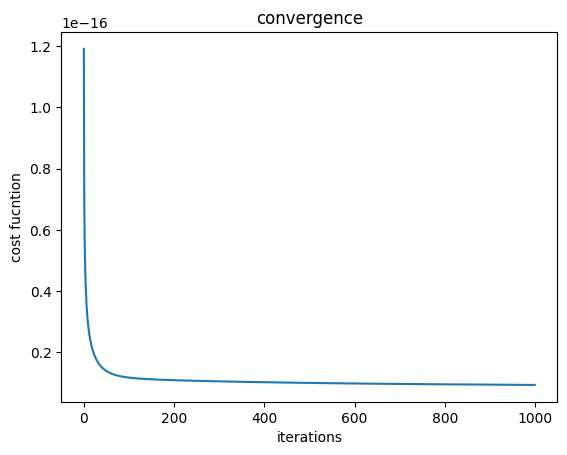

In [19]:
plt.plot(range(epochs),cost_fucntion)
plt.title("convergence")
plt.xlabel("iterations")
plt.ylabel("cost fucntion")
plt.show()
